In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("Set2")

%matplotlib inline

In [2]:
# !pip install seaborn

# Read data

In [3]:
df = pd.read_csv("../data/respuestas.csv")
df.shape

(144, 17)

In [4]:
df.head().transpose()

,0,1,2,3,4
timestamp,3/12/2021 19:15:01,3/17/2021 21:12:19,3/18/2021 21:28:35,3/26/2021 22:14:29,4/19/2021 13:40:42
q_edad,10,9,10,9,9
q_genero,f,f,m,f,f
q_donde_compu,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa
q_que_haces_compu,"a_que_haces_compu_videos, a_que_haces_compu_tarea",a_que_haces_compu_juegos,a_que_haces_compu_videos,"a_que_haces_compu_juegos, a_que_haces_compu_vi...","a_que_haces_compu_juegos, a_que_haces_compu_vi..."
q_donde_aprendiste_compu,a_donde_aprendiste_compu_casa,a_donde_aprendiste_compu_solo,a_donde_aprendiste_compu_escuela,"a_donde_aprendiste_compu_casa, a_donde_aprendi...",a_donde_aprendiste_compu_casa
q_que_celu_usas,a_que_celu_usas_propio,a_que_celu_usas_propio,a_que_celu_usas_propio,a_que_celu_usas_prestado,a_que_celu_usas_propio
q_que_haces_celu,"a_que_haces_celu_chat, a_que_haces_celu_videos...",a_que_haces_celu_redes,a_que_haces_celu_juegos,"a_que_haces_celu_chat, a_que_haces_celu_telefo...",a_que_haces_celu_chat
q_yt,a_yt_1compu,a_yt_1compu,a_yt_muchascompu,a_yt_nose,a_yt_celular
q_acceso_fotos,a_acceso_fotos_yoyotros,a_acceso_fotos_yo,a_acceso_fotos_yo,a_acceso_fotos_yoyotros,a_acceso_fotos_yo


# Descripción del grupo

A continuación se describe el grupo encuestado según distintas variables poblacionales. 


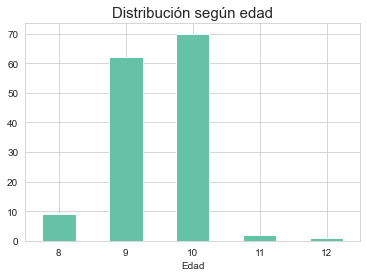

In [5]:
# Participantes por Edad

df["q_edad"].value_counts().sort_index().plot.bar(rot=0)
plt.xlabel("Edad")
plt.title("Distribución según edad", fontsize=15);

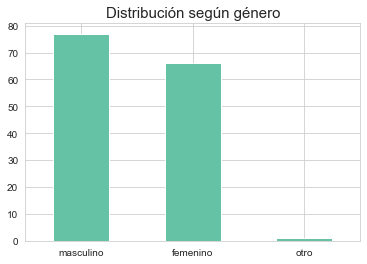

In [6]:
# Participantes por Género

df["q_genero"].value_counts().plot.bar(rot=0)
plt.xticks([0, 1, 2], ['masculino', 'femenino', 'otro'])
plt.title("Distribución según género", fontsize=15);

Podemos ver que se trata de un grupo bastante homogéneo en cuanto a la edad, en tanto es el objeto de nuestro estudio el grupo comprendido por niños y niñas de alrededor de diez años. En tanto al género tenemos una muy buena distribución también.

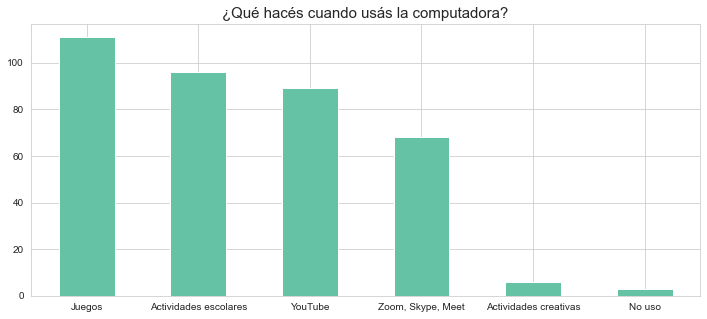

In [7]:
# ¿Qué hacés cuando usás la computadora (podés elegir más de una opción)?
positions = (0, 1, 2, 3, 4, 5)
labels = ("Juegos", "Actividades escolares", "YouTube", "Zoom, Skype, Meet", "Actividades creativas", "No uso")

df["q_que_haces_compu"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.bar(figsize=(12,5))
plt.title("¿Qué hacés cuando usás la computadora?", fontsize=15);
plt.xticks(positions, labels,rotation=0);


Queda claro que la mayor parte de los participantes utilizan la computadora en su casa. Siendo que tanto este año como el anterior vivimos en un contexto de pandemia, este resultado no resulta sorprendente.

Podemos destacar que la mayor parte de los niños y niñas parecieran contar con una computadora en sus hogares, siendo tan solo uno de ellos quien respondió que no poseía una.

También les preguntamos para qué utilizan más comúnmente la computadora. Les dimos la posibilidad de marcar más de una opción dentro de una serie de respuestas y al mismo tiempo, dejamos espacio disponible para poder completar con otras actividades que no estuvieran dentro de las que les habíamos propuesto.

Por otro lado, la mayoría utiliza la computadora para jugar juegos, siendo las siguientes actividades más usuales mirar videos en YouTube, realizar videollamadas utilizando Skype, Meet o Zoom y realizar actividades escolares. Nuevamente, esto tiene sentido siendo que durante todo el 2020 en Argentina hubo clases de manera virtual.

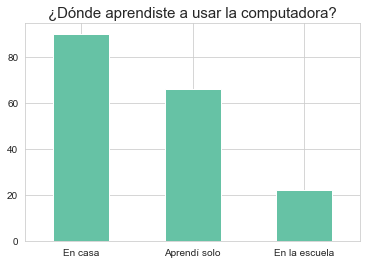

In [8]:
#¿Dónde aprendiste a usar la computadora? 

positions = (0, 1, 2)
labels = ("En casa", "Aprendí solo", "En la escuela")


df["q_donde_aprendiste_compu"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.bar()
plt.title("¿Dónde aprendiste a usar la computadora?", fontsize=15);

plt.xticks(positions, labels,rotation=0);


En cuanto a la forma en la que aprendieron a usar la computadora, podemos ver que las opciones más elegidas son _"Me enseñaron en mi casa (mis padres, hermanos u otro familiar)"_ y _"Aprendí solo"_. 

Podemos ver que la tendencia está claramente más orientada a la formación recibida en el hogar, tanto por la enseñanza directa por parte de la familia o bien tal vez por la observación o la experiencia indirecta, al ver a otros miembros de la familia. 

Esta hipótesis es respaldada por otros estudios anteriores, como por ejemplo el de Mertala [8] _“Young children's perceptions of ubiquitous computing and the Internet of Things”_ donde explica que el conocimiento de los chicos sobre las distintas tecnologías se basa en el contacto que tuvieron con éstas a través de sus padres, hermanos u otras figuras del entorno familiar o escolar. 

De esta forma, esta percepción de haber "aprendido solos" podría tener raíz en este contacto indirecto.

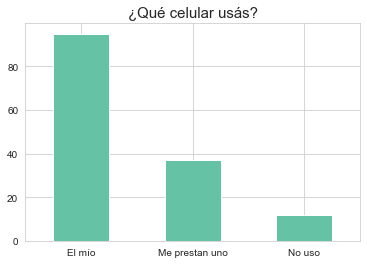

In [9]:
#¿Qué celular usás?

positions = (0, 1, 2)
labels = ("El mío", "Me prestan uno", "No uso")

df["q_que_celu_usas"].value_counts().plot.bar()
plt.title("¿Qué celular usás?", fontsize=15)
plt.xticks(positions, labels,rotation=0);


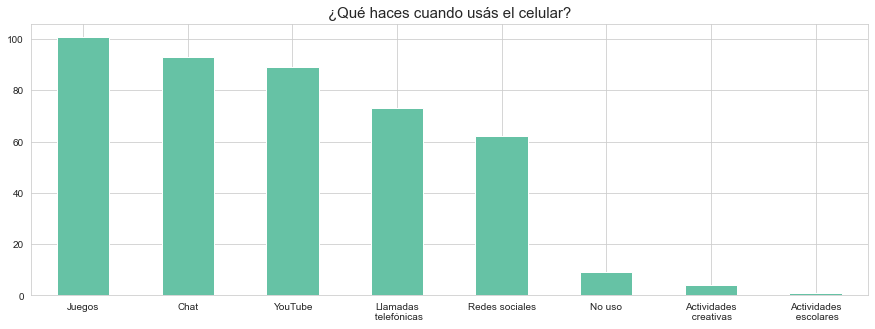

In [10]:
# Si usás celular: ¿qué haces cuando usás el celular? (podés elegir más de una opción)

positions = (0, 1, 2, 3, 4, 5, 6, 7)
labels = ("Juegos", "Chat", "YouTube", "Llamadas\n telefónicas", "Redes sociales", \
          "No uso", "Actividades\n creativas", "Actividades\n escolares")

df["q_que_haces_celu"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.title("¿Qué haces cuando usás el celular?", fontsize=15);
plt.xticks(positions, labels,rotation=0);


Al indagar en la forma en que los chicos y chicas utilizan los celulares nos encontramos con que la gran mayoría cuenta con un dispositivo propio.

La actividad más realizada es nuevamente jugar juegos, pero se suma con mucha importancia también el chat (utilizando aplicaciones de mensajería tales como Whatsapp, Telegram, etc) y mirar videos en YouTube.

Es llamativo que haya aparecido _"Llamadas telefónicas"_ como una actividad de una importancia considerable, aunque cabe preguntarse si habría que haber pedido que especifiquen si se referían videollamadas utilizando las aplicaciones anteriormente mencionadas, y en tal caso la actividad "Chat" cobraría aún más relevancia.

Dentro de _"Redes Sociales"_ se incluyen ejemplos como TikTok, Instagram y Facebook, aunque no les pedimos que especifiquen ninguna en particular. Sin embargo, sabemos por la consulta realizada previamente a la confección de la encuesta que realizamos a los referentes pedagógicos de la Fundación Sadosky que trabajan para el Plan Ceibal, que la red social elegida por sobre las otras es en estos momentos TikTok.

Por último, cabe destacar que _"Actividades creativas"_ no fue una opción propuesta por nosotros en el cuestionario (tanto en esta pregunta como en la relacionada a las actividades realizadas con la computadora), sino que fue agregada por los chicos y chicas al momento de completar la encuesta. Dentro de este grupo, agrupamos respuestas que se referían a la edición de videos y fotos (tal vez para compartir en aplicaciones tales como TikTok o Instagram), escuchar música y escribir historias.